# Load Data

A first look at the data:
1. There are missing data in train_data: for feature age, there are 177(19.9%) missing data; for feature cabin, there are 687(77.1%) missing data; for feature embarked, there are 2 missing data.
2. There are missing data in test_data: for feature age, there are 86(20.6%) missing data; for feature cabin, there are 327 missing data; for feature fare, there is 1 missing data.

In [251]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')

file = pd.read_csv('drive/My Drive/data/Housedata.txt',sep='\s+')
train_source_loc = 'drive/My Drive/data/train.csv'
test_source_loc = 'drive/My Drive/data/test.csv'
test_valid_loc = 'drive/My Drive/data/titanic_valid.csv'

train_data = pd.read_csv(train_source_loc)
test_data = pd.read_csv(test_source_loc)
test_valid = pd.read_csv(test_valid_loc)

def get_accuracy(y,fitted):
  count = 0
  for i in range(len(y)):
    if y[i]==fitted[i]:
      count+=1
  return count/len(y)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analysis of Data

## Summary 

## Survival Rates by Passenger Class.

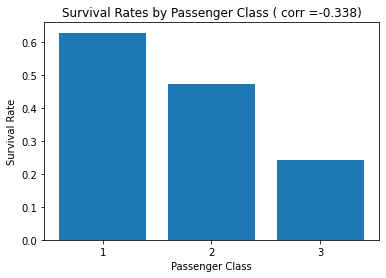

   Pclass  People  Survived  Survival_Rate
0     1.0   216.0     136.0       0.629630
1     2.0   184.0      87.0       0.472826
2     3.0   491.0     119.0       0.242363


In [14]:
# Compute the survival rates by Pclass
# Row 1: 1st class. Row 2: 2nd class. Row 3: 3rd class.
# For each row, the data records the number of people, the number of survival people and the survival rate.
survival_rate_pclass = np.empty([3,3])
for i in np.arange(1,4):
    temp = train_data.loc[train_data['Pclass']==i,['Survived']]
    survival_rate_pclass[i-1] = [len(temp),temp.sum(),temp.mean()]

# Compute the correlation coefficient
corrcoef = train_data[['Pclass','Survived']].corr(method='pearson').iloc[0,1]

# Draw a bar plot to show survival rates by Pclass
pclass_labels = ['1','2','3']
fig , ax = plt.subplots()
ax.bar(pclass_labels,survival_rate_pclass[:,2])
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rates by Passenger Class ( corr ='+str.format('{:0.3f}',corrcoef) +')')
plt.show()


survival_rate_pclass = pd.DataFrame(np.concatenate(([[1],[2],[3]],survival_rate_pclass),axis=1),\
                                    columns=['Pclass','People','Survived','Survival_Rate'])
print(survival_rate_pclass)

## Survival Rates by Gender

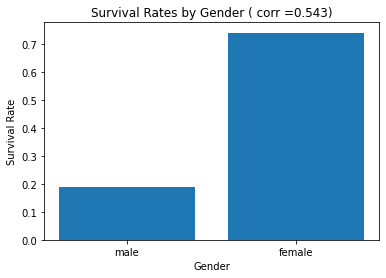

   Gender People Survived        Survival_Rate
0    male  577.0    109.0  0.18890814558058924
1  female  314.0    233.0   0.7420382165605095


In [20]:
# Compute survival rates by gender
# Row 1: male. Row 2: female. 
# For each row, the data records the number of people, the number of survival people and the survival rate.
survival_rate_gender = np.empty([2,3])  
j = 0
for i in ['male','female']:
    temp = train_data.loc[train_data['Sex']==i,['Survived']]
    survival_rate_gender[j] = [len(temp),temp.sum(),temp.mean()]
    j +=1


# Compute the correlation coefficient
temp = np.empty(len(train_data.index))
temp[train_data['Sex']=='male']=0
temp[train_data['Sex']=='female']=1

corrcoef = np.corrcoef(temp,train_data['Survived'].values)[0,1]

# Draw a bar plot to show survival rates by gender
gender_labels = ['male','female']

fig , ax = plt.subplots();
ax.bar(gender_labels,survival_rate_gender[:,2])
ax.set_xlabel('Gender')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rates by Gender ')
ax.set_title('Survival Rates by Gender ( corr ='+str.format('{:0.3f}',corrcoef) +')')
plt.show()

survival_rate_gender = pd.DataFrame(np.concatenate(([['male'],['female']],survival_rate_gender),axis=1),\
                                    columns=['Gender','People','Survived','Survival_Rate'])
print(survival_rate_gender)

## Survival Rates by Gender and Passenger Class

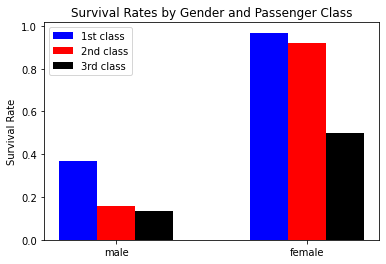

   Gender    1st_Survival_Rate   2nd_Survival_Rate    3rd_Survival_Rate
0    male  0.36885245901639346  0.1574074074074074  0.13544668587896252
1  female   0.9680851063829787  0.9210526315789473                  0.5


In [16]:
survival_rate_genpclass = np.empty([2,3])

k=0
for i in ['male','female']:
    for j in range(3):
        survival_rate_genpclass[k,j]=train_data.loc[(train_data['Sex']==i) & (train_data['Pclass']==(j+1)),['Survived']].mean()
    k+=1

fig , ax = plt.subplots()
x_coordinates = np.arange(2)
bar_width=0.2
ax.bar(x_coordinates,survival_rate_genpclass[:,0], color='b', width=bar_width, label='1st class')
ax.bar(x_coordinates+bar_width,survival_rate_genpclass[:,1], color='r', width=bar_width, label='2nd class')
ax.bar(x_coordinates+2*bar_width,survival_rate_genpclass[:,2], color='k', width=bar_width, label='3rd class')
ax.set_xticks(x_coordinates+bar_width)
ax.set_xticklabels(['male','female'])
ax.legend()
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rates by Gender and Passenger Class')
plt.show()

survival_rate_genpclass = pd.DataFrame(np.concatenate(([['male'],['female']],survival_rate_genpclass),axis=1),\
                                       columns=['Gender','1st_Survival_Rate','2nd_Survival_Rate','3rd_Survival_Rate'])
print(survival_rate_genpclass)

## Survival Rates by Age

> Check that the data of Age being missing is not related to survival rates, i.e. the value of Age is missing at random.

In [ ]:
survival_rate_agen = np.empty(2)
survival_rate_agen[0] = train_data.loc[train_data['Age'].isna(),['Survived']].mean()
survival_rate_agen[1] = train_data.loc[~train_data['Age'].isna(),['Survived']].mean()
print(survival_rate_agen)

survival_rate_agen = np.empty(2)
survival_rate_agen[0] = train_data.loc[(train_data['Age'].isna()) & (train_data['Sex']=='female') & (train_data['Pclass']==3),['Survived']].mean()
survival_rate_agen[1] = train_data.loc[(~train_data['Age'].isna()) & (train_data['Sex']=='female') & (train_data['Pclass']==3),['Survived']].mean()
print(survival_rate_agen)

The correlation coefficient between 'Age' and 'Survived' is really low -0.077221. As shown in previous section, if a passenger is a female and is in 1st or 2nd class, she is 94.7% likely to survive. Within the subgroup, the feature 'Age' does not play much a role in predicting whether a passenger survives or not. However 'Age' plays a role in other subgroups.

In [ ]:
#train_data.loc[~train_data['Age'].isna(),['Age','Survived']].corr(method='pearson')
#train_data.loc[(~train_data['Age'].isna()) & (train_data['Sex']=='female') & (train_data['Pclass']==2),['Age','Survived']].corr(method='pearson')

The correlation coefficients between 'Age' and 'Survived'  
1. male, pclass = 1 : -0.270566
2. male, pclass = 2 : -0.422569
3. male, pclass = 3 : -0.146657
4. female, pclass = 3 : -0.176617
5. female, pclass = 1 : 0.12644
6. female, pclass = 2 : -0.169067

In [ ]:
def survival_rate_age(x,data):
    y = np.zeros(len(x))
    max_age = data['Age'].max()
    for i in range(len(x)) :
        if (data['Age']<=x[i]).sum()==0 :
            continue
        if x[i]==max_age:
            y[i]=y[i-1]
            continue
        y[i] = data.loc[data['Age']<=x[i],['Survived']].mean()
    return y

x = np.arange(0,80)

fig , axe = plt.subplots(2,3,figsize=(20,15))
for i,gender in enumerate(['male','female']):
    for j in np.arange(1,4):
        pclass_gender = train_data.loc[(~train_data['Age'].isna()) & (train_data['Sex']==gender) & (train_data['Pclass']==j),['Age','Survived']]
        y = survival_rate_age(x,pclass_gender)
        axe[i,j-1].plot(x,y)
        axe[i,j-1].set_xlabel('Age')
        axe[i,j-1].set_ylabel('Survival Rate')
        axe[i,j-1].set_title('Cumulative Survival Rate for '+gender+' in Pclass '+str(j))
plt.show()

In [ ]:
condition = ~((train_data['Parch']!=0) |(train_data['SibSp']!=0))
condition = condition & (train_data['Sex']=='male') & (train_data['Pclass']==1)
condition = condition & (train_data['Age']>25)& (train_data['Age']<30)
train_data.loc[condition,'Survived'].mean()

## Explore the relation between Fare and Pclass

There are 15 people whose fare is 0.

In [18]:
fare_pclass = np.empty([3,4])
for i in np.arange(1,4):
    temp = train_data.loc[train_data['Pclass']==i,['Fare']]
    fare_pclass[i-1] = [i,temp.min(),temp.max(),temp.mean()]

fare_pclass = pd.DataFrame(fare_pclass,columns=['Pclass','Min','Max','Mean'])

print(fare_pclass)

   Pclass  Min       Max       Mean
0     1.0  0.0  512.3292  84.154687
1     2.0  0.0   73.5000  20.662183
2     3.0  0.0   69.5500  13.675550


## Explore other features

### Study families on board

The first task is to group family members. The intuitive method is to use family names. However the drawback is that two different families can share the same family name. An alternative is based on the observation that the ticket numbers for family members are the same. But there is still a little chance that different families share the same family name and the same ticket number. Luckily, there is no such issue in this example. Instead, we find that family members can have different family names. There are 5 such instances and their ticket numbers are: '113505', '13502', '230433', '24160', '36947', 'C.A. 33112'.

In the end, if we use the criterion that if passengers have the same ticket numbers and either of their SibSp or Parch is nonzero, then they belong to the same family, it yields the accurate the conclusion that they belong to the same family.

In [ ]:
'''
# This code is used in previous version to locate problematic cases
family_features = []
for i,flag in enumerate((train_data['Parch']!=0) |(train_data['SibSp']!=0)):
    if flag:
        family_features.append(train_data.loc[i,'Ticket'])
        
family_features = np.unique(family_features)

family_features1 = []
for i,flag in enumerate((train_data['Parch']!=0) |(train_data['SibSp']!=0)):
    if flag:
        temp = train_data.loc[i,'Name'].split(',')[0]
        family_features1.append(temp+','+train_data.loc[i,'Ticket'])
        
family_features1 = np.unique(family_features1)

count = np.zeros(len(family_features1))
for notation in family_features1:
    temp = notation.split(',')[-1]
    for j,test in enumerate(family_features):
        if test==temp:
            count[j]+=1
            break
'''

The following graph demonstrates the survival connectedness inside a family. At the first sight, it seems that if a family member survives, then other family members are more likely to survive.

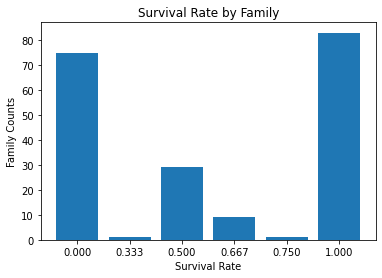

In [17]:
# classify families by ticket numbers
family_ticket = []
for i,flag in enumerate((train_data['Parch']!=0) |(train_data['SibSp']!=0)):
    if flag:
        family_ticket.append(train_data.loc[i,'Ticket'])
        
family_ticket = np.unique(family_ticket)
        

# Compute the survival rate by family
survival_rate_family = np.zeros(len(family_ticket))
total = np.zeros(len(family_ticket))
freq = np.zeros(len(family_ticket))
for i,flag in enumerate((train_data['Parch']!=0) |(train_data['SibSp']!=0)):
    if flag:
        for j,ticket_num in enumerate(family_ticket):
            if train_data.loc[i,'Ticket']==ticket_num:
                total[j] +=1
                freq[j] +=train_data.loc[i,'Survived']
            
for i in range(len(family_ticket)):
    survival_rate_family[i] = freq[i]/total[i]

    
# Draw the count plot to show the distribution of families with respect to survival rates    
temp = np.unique(survival_rate_family)
temp_count = np.zeros(len(temp))
for i in range(len(survival_rate_family)):
    for j in range(len(temp)):
        if temp[j]==survival_rate_family[i]:
            temp_count[j]+=1
            break
            
fig , ax = plt.subplots()
x = np.arange(1,len(temp)+1)
x_labels = np.empty(len(temp),dtype=(np.unicode_,5))
for i in range(len(temp)):
    x_labels[i] = str.format('{:1.3f}',temp[i])
ax.bar(x,temp_count)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Survival Rate')
ax.set_ylabel('Family Counts')
ax.set_title('Survival Rate by Family')
plt.show()    

In [290]:
train_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [362]:
my_set = []
for i in range(len(family_ticket)):
    if survival_rate_family[i]>0:
        my_set.append(family_ticket[i])

location = []
for i in train_data['Ticket']:
  location.append((i in my_set))
location = ((train_data['SibSp']!= 0) | (train_data['Parch'])) & location


In [367]:
train_data.loc[location & (train_data['Pclass']==1) & (train_data['Sex']=='male') ].sort_values(by=['Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.00,1,0,19996,52.0000,C126,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.00,1,0,113789,52.0000,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.00,1,0,11753,52.5542,D19,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.00,1,0,113806,53.1000,E8,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.00,1,0,113803,53.1000,C123,S
370,371,1,1,"Harder, Mr. George Achilles",male,25.00,1,0,11765,55.4417,E50,C
434,435,0,1,"Silvey, Mr. William Baird",male,50.00,1,0,13507,55.9000,E44,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.00,1,0,PC 17485,56.9292,A20,C
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.00,1,0,17474,57.0000,B20,S


After a detailed study, for families having 50% survival rate, the above survival connectedness does not apply. On the other hand, we found a astonishing fact that for people in all classes, all female family members and kid survived. However all other male family members did not survive. However lifeboats were limited, all men still sticked to their conscience and behaved like gentlemen.

It seems that for people in 2nd and 3rd, they were more willing to keep the discipline. Or maybe, when it was their turns, they had little choices and people in 1st class had priority to board on lifeboats. For people in 1st, it is like 50-50 that people kept this discipline and people did not. 

At the end, we come up with the following way to define the survival connectedness.

1. The default survival connectedness for all passengers are 0.5.
2. For male adults in pclass 1, their survival connectedness are 0.5. For male adults in pclass 2 and 3, their survival connectedness are 0.
3. For kids and females in pclass 1 and pclass, their survial connectedness are 1.
4. For kids and females in the 3rd pclass, set their survival connectedness due to 1 or 0 due to the surival rate of the family. If it is not zero, set it to 1, otherwise set it to 0.  

In a word, we do the classification by hand.

The sum of SibSp and Parch of one passenger may not reveal the family size. For example, Minahan, Dr. William Edward is the spouse of Minahan, Mrs. William Edward and the sibling of Minahan, Miss. Daisy E, then his SibSp is 2. But Minahan, Miss. Daisy E is not a sibling of Minahan, Mrs. William Edward. She is a sibling by law. In the data set, it does not count such case. Therefore SibSp of Minahan, Miss. Daisy E is 1. However this case only occurs a few times and for simplicity, let us just add SisSp and Parch together.

In [19]:
pd.concat([train_data[train_data['Ticket']=='19928'],test_data[test_data['Ticket']=='19928']],axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0.0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
412,413,1.0,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0,C78,Q


### Survival Rate by Embarked

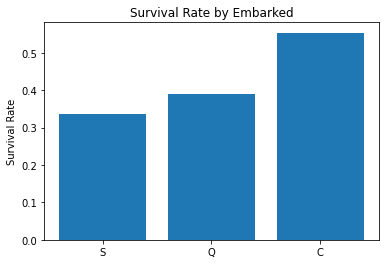

In [21]:
x_heights = np.zeros(3)
labels = np.array(['S','Q','C'])
for i,code in enumerate(labels):
    x_heights[i] = train_data.loc[(~train_data['Embarked'].isna()) & (train_data['Embarked']==code),'Survived'].mean()

fig , ax = plt.subplots()
ax.bar(labels,x_heights)
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Embarked')
plt.show()

### Survival Rate by Missing Cabin

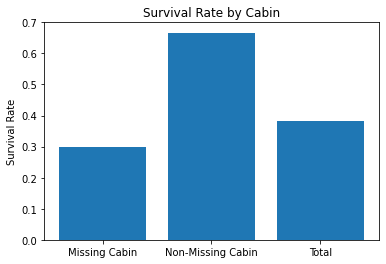

In [22]:
x_heights = np.zeros(3)
x_heights[0] = train_data.loc[train_data['Cabin'].isna(),'Survived'].mean()
x_heights[1] = train_data.loc[~train_data['Cabin'].isna(),'Survived'].mean()
x_heights[2] = train_data['Survived'].mean()
labels = ['Missing Cabin', 'Non-Missing Cabin', 'Total']

fig , ax = plt.subplots()
ax.bar(labels,x_heights)
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Cabin')
plt.show()

Even in subgroups excluding female in 1st or 2nd pclass, Cabin data being missing still influences the survival rate.
> Let us transform Cabin data into categorial data : 1 stands for that the data is not missing, 0 stands for that the data is missing.

In [ ]:
'''
location = ((train_data['Pclass']==1) | (train_data['Pclass']==2)) & (train_data['Sex']=='female') 
train_data.loc[(~train_data['Cabin'].isna())& (~location),'Survived'].mean()
'''

## Title and Age

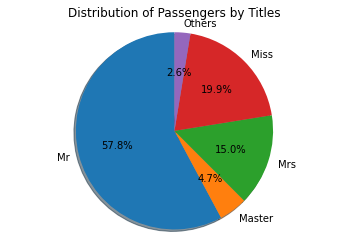

"\nfig , ax =plt.subplots(3,2,figsize=(15,15))\nfor i in range(3):\n    for j in range(2):\n        ax[i,j].hist(title_age_distribution[i*2+j])\n        ax[i,j].set_xlabel('Age')\n        ax[i,j].set_ylabel('Count of People')\n        ax[i,j].set_title('Distribution of Age for People with Title '+title_na[i*2+j])\nplt.show()\n"

In [59]:
title_train = train_data['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
title_test = test_data['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

title_age_train = pd.DataFrame(np.transpose([title_train,train_data['Age']]),columns=['Title','Age']).astype({'Age':'float64'})
title_age_test = pd.DataFrame(np.transpose([title_test,test_data['Age']]),columns=['Title','Age']).astype({'Age':'float64'})
title_age = pd.concat([title_age_train,title_age_test],axis=0,ignore_index=True)

title = np.unique(np.concatenate([title_test,title_train]))

title_nums = np.zeros(len(title))
for i in range(len(title_age.index)):
    for j in range(len(title)):
        if title[j]==title_age.loc[i,'Title']:
            title_nums[j]+=1
            break

            
title_cleaned = np.array(['Mr','Master','Mrs','Miss','Others'])
title_nums_cleaned = np.zeros(5)
for i in range(len(title)):
    for j,flag in enumerate(['Mr','Master','Mrs','Miss','Others']):
        if title[i]==flag:
            title_nums_cleaned[j]=title_nums[i]
            break
        if j==4:
            title_nums_cleaned[j]+=title_nums[i]
            
fig, ax = plt.subplots()
ax.pie(title_nums_cleaned, labels=title_cleaned, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Distribution of Passengers by Titles')
plt.show()    

# Titles for passegners whose age is missing
title_na = np.unique(title_age.loc[title_age['Age'].isna(),'Title'])

title_age_distribution = []
for i in range(len(title_na)):
    title_age_distribution.append(title_age.loc[ (~title_age['Age'].isna()) & (title_age['Title']==title_na[i]),'Age'].values)  

'''
fig , ax =plt.subplots(3,2,figsize=(15,15))
for i in range(3):
    for j in range(2):
        ax[i,j].hist(title_age_distribution[i*2+j])
        ax[i,j].set_xlabel('Age')
        ax[i,j].set_ylabel('Count of People')
        ax[i,j].set_title('Distribution of Age for People with Title '+title_na[i*2+j])
plt.show()
'''    

# Feature Transform

Based on discussions in Section analysis of data, we decide to select features from

1. Sex
2. Pclass
3. Age
4. Connectedness (Connected Survival)
5. Embarked
6. Cabin
7. Family Size
8. Title (It is somehow related to Age)
9. Fare

In [260]:
def data_transform(data,title_age,family_ticket,title_age_distribution):
  global title_na
  # Transform the categorial code 'Embarked' into numerical values 
  # S : 0.  Q : 1.  C : 2.
  embarked = data['Embarked'].map({'S':0, 'Q':1, 'C':2}).fillna(1).to_frame('Embarked')

  # Map exising cabin data and missing cabin data into 0 and 1.
  cabin = np.zeros(len(data.index))
  for i in data.index:
    if pd.isna(data.loc[i,'Cabin']):
      cabin[i] = 0
    else:
      cabin[i] = 1
  cabin =pd.DataFrame(cabin,columns=['Cabin'])

  # Transform the categorial data 'Sex' into numerical values 
  # male : 0.  female : 1.
  sex = data['Sex'].map({'male':0,'female':1}).to_frame('Sex')
  
  # Pclass
  pclass = data[['Pclass']]
  
  # fare
  fare = data[['Fare']]

  # Combine SibSp and Parch into the one feature family_size
  # family_size = (data['SibSp']+data['Parch']+1).to_frame('FamilySize')
  family_size = data[['SibSp','Parch']]

  # Define a new feature connected survival 
  connected = np.zeros(len(data.index))+0.38
  location =  (data['SibSp']!=0) | (data['Parch']!=0)
  connected[ location & ((data['Pclass']==2)|(data['Pclass']==3)) & (data['Sex']=='male')]=0
  connected[ location & ((data['Pclass']==1)|(data['Pclass']==2)) & (data['Sex']=='female')]=1
  male_kids = (data['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)=='Master')
  connected[ location & ((data['Pclass']==1)|(data['Pclass']==2)) & male_kids ]=1
  my_set = []
  for i in range(len(family_ticket)):
    if survival_rate_family[i]>0:
      my_set.append(family_ticket[i])
      
  for i,flag in enumerate(location):
    if flag:
      if male_kids[i] | (data.loc[i,'Sex']=='female') | (data.loc[i,'Pclass']==1):
        if data.loc[i,'Ticket'] in my_set :
          connected[i]=1
        else :
          connected[i]=0

  male_kids = (data['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)=='Master')
  connected[ location & ((data['Pclass']==2)|(data['Pclass']==3)) & (data['Sex']=='male') & (~male_kids )]=0
  connected = pd.DataFrame(connected,columns=['Connected'])

  title_age = title_age.copy()
  # Impute Age by the mean in the responding title group 
  for i in title_age.index:
    if pd.isna(title_age.loc[i,'Age']):
      for j,flag in enumerate(title_na):
        if title_age.loc[i,'Title']==title_na[j]:
          title_age.loc[i,'Age']=title_age_distribution[j].mean()
          break
                
  # Transform titles other: 0, Mr: 1, Mrs: 2, Miss: 3,  Master: 4.
  for i in title_age.index:
    flag1 = True
    for j,flag in enumerate(['Mr','Mrs','Miss','Master']):
      if flag == title_age.loc[i,'Title']:
        title_age.loc[i,'Title']=j
        flag1 = False
        break
    if flag1:
      title_age.loc[i,'Title']=0
        
  title_age = title_age.astype({'Title':'int64'}) 

  # Combine all features together
  X = pd.concat([sex,pclass,title_age,connected,cabin,family_size,embarked,fare],axis=1) 
  return X

In [261]:
X_train = data_transform(train_data,title_age_train,family_ticket,title_age_distribution)
X_test = data_transform(test_data,title_age_test,family_ticket,title_age_distribution)
y = train_data['Survived']

In [288]:
pd.concat([X_train,y],axis=1).corr()

,Sex,Pclass,Title,Age,Connected,Cabin,SibSp,Parch,Embarked,Fare,Survived
Sex,1.000000,-0.131900,0.681678,-0.114664,0.318579,0.140391,0.114631,0.245489,0.112094,0.182333,0.543351
Pclass,-0.131900,1.000000,-0.001368,-0.344338,-0.372341,-0.725541,0.083081,0.018443,-0.166521,-0.549500,-0.338481
Title,0.681678,-0.001368,1.000000,-0.459314,0.264420,0.055269,0.327899,0.348587,0.066527,0.146651,0.459406
Age,-0.114664,-0.344338,-0.459314,1.000000,-0.026490,0.235836,-0.266602,-0.196224,0.029800,0.091912,-0.087092
Connected,0.318579,-0.372341,0.264420,-0.026490,1.000000,0.344585,-0.093206,0.109541,0.127287,0.287465,0.594788
Cabin,0.140391,-0.725541,0.055269,0.235836,0.344585,1.000000,-0.040460,0.036987,0.165383,0.482075,0.316912
SibSp,0.114631,0.083081,0.327899,-0.266602,-0.093206,-0.040460,1.000000,0.414838,-0.069568,0.159651,-0.035322
Parch,0.245489,0.018443,0.348587,-0.196224,0.109541,0.036987,0.414838,1.000000,-0.041137,0.216225,0.081629
Embarked,0.112094,-0.166521,0.066527,0.029800,0.127287,0.165383,-0.069568,-0.041137,1.000000,0.227421,0.171249
Fare,0.182333,-0.549500,0.146651,0.091912,0.287465,0.482075,0.159651,0.216225,0.227421,1.000000,0.257307


# Intuitive Classification

We apply some pattens found in Section explanatory analysis of data to perform prediction. It can be used as a baseline accuracy criterion for ML models. 

In [379]:
features = test_data.columns.drop(['PassengerId','Embarked','Fare'])
X = test_data[features]
fitted = np.zeros(len(X.index))

y_true = test_valid['Survived']

# The score of the following intuitive classification is 0.77511
# If a passenger is a female and her pclass is 1st or 2nd, she survives.
location = ((X['Pclass']==1) | (X['Pclass']==2)) & (X['Sex']=='female') 
fitted[location] = 1
print(get_accuracy(y_true,fitted))

# The score is 0.78468 after adding that Kids in 1st and 2nd class survive
# Kids in 1st and 2nd class survive
kids = test_data['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
kids = (kids=='Master')
kids = ((X['Pclass']==1) | (X['Pclass']==2)) & kids
for i,flag in enumerate(kids):
  if flag:
    fitted[i]=1
print(get_accuracy(y_true,fitted))

# The score is 0.815789 after we further use the connected survival rate for families in 3rd class.
my_set = []
for i in range(len(family_ticket)):
  if survival_rate_family[i]>0:
    my_set.append(family_ticket[i])
        
titles = test_data['Name'].str.extract(r'([A-Za-z]+)\.')
for i in range(len(test_data.index)):
  condition = (test_data.loc[i,'Parch']!=0) | (test_data.loc[i,'SibSp']!=0) 
  if condition & (test_data.loc[i,'Pclass']==3):
    if (titles.iloc[i][0]=='Master') | (test_data.loc[i,'Sex']=='female') | ( test_data.loc[i,'Fare']<25):
      if test_data.loc[i,'Ticket'] in my_set :
        fitted[i]=1
print(get_accuracy(y_true,fitted))

0.7751196172248804
0.784688995215311
0.8157894736842105


In [382]:
features = train_data.columns.drop(['PassengerId','Embarked','Fare'])
X = train_data[features]
fitted = np.zeros(len(X.index))

y_true = train_data['Survived']

# The score of the following intuitive classification is 0.77511
# If a passenger is a female and her pclass is 1st or 2nd, she survives.
location = ((X['Pclass']==1) | (X['Pclass']==2)) & (X['Sex']=='female') 
fitted[location] = 1
print(get_accuracy(y_true,fitted))

# The score is 0.78468 after adding that Kids in 1st and 2nd class survive
# Kids in 1st and 2nd class survive
kids = train_data['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
kids = (kids=='Master')
kids = ((X['Pclass']==1) | (X['Pclass']==2)) & kids
for i,flag in enumerate(kids):
  if flag:
    fitted[i]=1
print(get_accuracy(y_true,fitted))

# The score is 0.815789 after we further use the connected survival rate for families in 3rd class.
my_set = []
for i in range(len(family_ticket)):
  if survival_rate_family[i]>0:
    my_set.append(family_ticket[i])
        
titles = train_data['Name'].str.extract(r'([A-Za-z]+)\.')
for i in range(len(train_data.index)):
  condition = (train_data.loc[i,'Parch']!=0) | (train_data.loc[i,'SibSp']!=0) 
  if condition & (train_data.loc[i,'Pclass']==3):
    if (titles.iloc[i][0]=='Master') | (train_data.loc[i,'Sex']=='female') | ( train_data.loc[i,'Fare']<25):
      if train_data.loc[i,'Ticket'] in my_set :
        fitted[i]=1
print(get_accuracy(y_true,fitted))

0.7867564534231201
0.8002244668911336
0.8451178451178452


# Build Model

Based on the numerical simulation, if we select a proper set of features, the best accuracy of predition for KNN, logistic regression(it does not converge and it is not reliable in this case), Random forest are almost the same 0.8~0.808. But it is not very impressive. 

When applying the cross-validation method to choose features, it is better to perform it several times. But anyway, the principle only says on average the chosen set of features performs better. For a specific set of test data, it may not be optimal for the corresponding method.

Random forest as an ensemble method, performs better than DecisionTreeClassifier. Howevert the randomness is really anonying. The prediction accuracy changes from 0.78 to 0.808. 

In [172]:
model_list = {"KNN": KNeighborsClassifier(n_neighbors=7),\
          "Logistic Regression": LogisticRegression(penalty='l2',solver='saga'), \
          "Random Forest": RandomForestClassifier(max_depth=2),\
          "SVC" : SVC(probability=True),\
          "DecisionTreeClassifier" : DecisionTreeClassifier(),\
          "AdaBoostClassifier" : AdaBoostClassifier(),\
          "GradientBoostingClassifier" : GradientBoostingClassifier(),\
          "GaussianNB" : GaussianNB(),\
          "LinearDiscriminantAnalysis" : LinearDiscriminantAnalysis(),\
          "QuadraticDiscriminantAnalysis" : QuadraticDiscriminantAnalysis(),\
          "KMeans" : KMeans(n_clusters=2, random_state=0)}

In [173]:
# 'Sex', 'Pclass', 'Title', 'Age', 'Connected', 'Cabin', 'FamilySize', 'Embarked', 'Fare'
features = ['Sex','Pclass','Title','Cabin','Connected'] 

for method_name in model_list:
    model = model_list[method_name]
    model_trained = model.fit(X_train[features],y)
    fitted = model_trained.predict(X_test[features])
    print(method_name,' : the training accuracy is ',get_accuracy(test_valid['Survived'],fitted))   

KNN  : the training accuracy is  0.8038277511961722
Logistic Regression  : the training accuracy is  0.7799043062200957
Random Forest  : the training accuracy is  0.7822966507177034
SVC  : the training accuracy is  0.80622009569378
DecisionTreeClassifier  : the training accuracy is  0.7488038277511961
AdaBoostClassifier  : the training accuracy is  0.7440191387559809
GradientBoostingClassifier  : the training accuracy is  0.7488038277511961
GaussianNB  : the training accuracy is  0.7392344497607656
LinearDiscriminantAnalysis  : the training accuracy is  0.7488038277511961
QuadraticDiscriminantAnalysis  : the training accuracy is  0.7607655502392344
KMeans  : the training accuracy is  0.7535885167464115


## Feature Selection (Cross Validation)

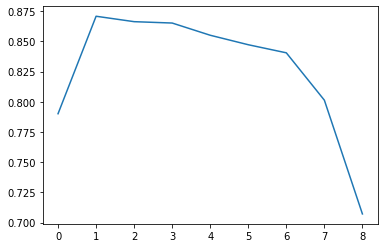

['Connected',
 'Sex',
 'Title',
 'Cabin',
 'Pclass',
 'Embarked',
 'FamilySize',
 'Age',
 'Fare']

In [258]:
model = KNeighborsClassifier(n_neighbors=8)
# Forward stepsize selection
features = X_train.columns 
y = train_data['Survived']

forward_selection_set_score = []
for i in range(len(features)):
  if i==0:
    forward_selection_set = []
  flag = True
  for j in features :
    score_temp = cross_val_score(model,X_train[np.append(forward_selection_set,j)],y,cv=5).mean()
    if flag:
      score_max = [score_temp,j]
      flag = False
    else:
      if score_max[0] < score_temp:
        score_max = [score_temp,j]
  forward_selection_set.append(score_max[1])
  features = np.delete(features,np.where(features==score_max[1]),axis=0)
  forward_selection_set_score.append(score_max[0])

plt.plot(forward_selection_set_score)
plt.show()
forward_selection_set

## LogisticRegression

In [225]:
# Features selected the k-fold cross validation 
# train_test_split(X_train, y, test_size=0.20, random_state=46)

features = ['Sex',
 'Connected',
 'FamilySize',
 'Embarked',
 'Pclass',
 'Title',
 'Age']
model = LogisticRegression(penalty='l2',solver='saga',max_iter=100)
model_trained = model.fit(X_train[features],y)
model_trained.score(X_train[features],y)

fitted = model_trained.predict(X_test[features])
print('The training accuracy is ',get_accuracy(test_valid['Survived'],fitted)) 

The training accuracy is  0.8014354066985646


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Random Forest

In [287]:
# Features selected the k-fold cross validation 
# train_test_split(X_train, y, test_size=0.20, random_state=46)

features = ['Sex',
 'Connected',
 'Title',
 'Embarked',
 'Age',
 'Cabin',
 'Pclass']
model = RandomForestClassifier(max_depth=2)
model_trained = model.fit(X_train[features],y)
model_trained.score(X_train[features],y)

fitted = model_trained.predict(X_test[features])
print('The training accuracy is ',get_accuracy(test_valid['Survived'],fitted)) 

The training accuracy is  0.8086124401913876


In [276]:
features = ['Sex',
 'Connected',
 'Title',
 'Pclass']
model = RandomForestClassifier(max_depth=2)
model_trained = model.fit(X_train[features],y)
model_trained.score(X_train[features],y)

fitted = model_trained.predict(X_test[features])
print('The training accuracy is ',get_accuracy(test_valid['Survived'],fitted)) 

# cross_val_score(RandomForestClassifier(max_depth=2),X=X_train[features],y=y,cv=5).mean()

The training accuracy is  0.7464114832535885


## GradientBoostingClassifier

In [103]:
# Features selected the k-fold cross validation 
# train_test_split(X_train, y, test_size=0.20, random_state=46)

features = ['Sex',
 'Connected',
 'FamilySize',
 'Pclass',
 'Age']

model = GradientBoostingClassifier()
model_trained = model.fit(X_train[features],y)
model_trained.score(X_train[features],y)

fitted = model_trained.predict(X_test[features])
print('The training accuracy is ',get_accuracy(test_valid['Survived'],fitted)) 

The training accuracy is  0.7559808612440191


## KNeighborsClassifier

In [109]:
# Features selected the k-fold cross validation 
# train_test_split(X_train, y, test_size=0.20, random_state=46)
features = ['Sex',
 'Connected',
 'FamilySize',
 'Title']
model = KNeighborsClassifier(n_neighbors=8)
model_trained = model.fit(X_train[features],y)
model_trained.score(X_train[features],y)

fitted = model_trained.predict(X_test[features])
print('The training accuracy is ',get_accuracy(test_valid['Survived'],fitted)) 

The training accuracy is  0.7535885167464115


In [259]:
features = ['Sex','Pclass','Title','Connected'] 

model = KNeighborsClassifier(n_neighbors=8)
model_trained = model.fit(X_train[features],y)
model_trained.score(X_train[features],y)

fitted = model_trained.predict(X_test[features])
print('The training accuracy is ',get_accuracy(test_valid['Survived'],fitted))

0.8327721661054994
The training accuracy is  0.7822966507177034


## SVC

In [114]:
# Features selected the k-fold cross validation 
# train_test_split(X_train, y, test_size=0.20, random_state=46)
features = ['Sex',
 'Connected',
 'Pclass',
 'Title',
 'Embarked',
 'Cabin',
 'FamilySize']

model = SVC(probability=True)
model_trained = model.fit(X_train[features],y)
model_trained.score(X_train[features],y)

fitted = model_trained.predict(X_test[features])
print('The training accuracy is ',get_accuracy(test_valid['Survived'],fitted))

The training accuracy is  0.7703349282296651


In [124]:
features = ['Sex','Pclass','Title','Connected'] 

model = SVC(probability=True)
model_trained = model.fit(X_train[features],y)
model_trained.score(X_train[features],y)

fitted = model_trained.predict(X_test[features])
print('The training accuracy is ',get_accuracy(test_valid['Survived'],fitted))

The training accuracy is  0.80622009569378


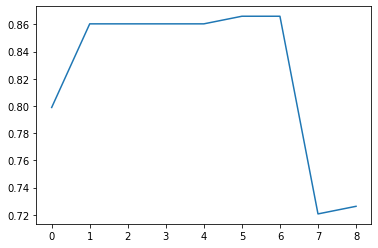

['Connected',
 'Sex',
 'Pclass',
 'Cabin',
 'FamilySize',
 'Title',
 'Embarked',
 'Age',
 'Fare']

In [116]:
model = SVC(probability=True)

# Forward stepsize selection
features = X_train.columns 
y = train_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(X_train, y, test_size=0.20, random_state=0)

forward_selection_set_score = []
for i in range(len(features)):
  if i==0:
    forward_selection_set = []
  flag = True
  for j in features :
    model_trained = model.fit(x_train[np.append(forward_selection_set,j)],y_train)
    score_temp = model_trained.score(x_test[np.append(forward_selection_set,j)],y_test)
    if flag:
      score_max = [score_temp,j]
      flag = False
    else:
      if score_max[0] < score_temp:
        score_max = [score_temp,j]
  forward_selection_set.append(score_max[1])
  features = np.delete(features,np.where(features==score_max[1]),axis=0)
  forward_selection_set_score.append(score_max[0])

plt.plot(forward_selection_set_score)
plt.show()
forward_selection_set

## DecisionTreeClassifier

In [167]:
features = ['Sex',
 'Connected',
 'Title',
 'Age',
 'Pclass']

model = DecisionTreeClassifier(max_depth=2)
model_trained = model.fit(X_train[features],y)
model_trained.score(X_train[features],y)

fitted = model_trained.predict(X_test[features])
print('The training accuracy is ',get_accuracy(test_valid['Survived'],fitted)) 

The training accuracy is  0.7535885167464115


# Summary

The goal of using machine learning methods in classifcation problems is to help us to identify some hidden pattens. If we can find and identify the patten explicitly, it is better or more accurate to perform prediction directly. For this problem, it is better to transform all data into several categories instead of wroking with continuous numerical data. 

# Appendix

In [ ]:
## Random Forest

X = pd.concat([sex,pclass,title_age_train,connected],axis=1)
Y = train_data['Survived']

grid_param = {
 'n_estimators': [50,100, 150, 200, 250],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 5,7],
 'bootstrap': [True, False],
}
gd_sr = GridSearchCV(estimator=model,
 param_grid=grid_param,
 scoring='accuracy',
 cv=5,
 n_jobs=-1)
gd_sr.fit(X, Y)
best_parameters = gd_sr.best_params_
print(best_parameters)


In [381]:
fitted = pd.DataFrame(fitted,columns=['Survived'])
result = pd.concat([test_data['PassengerId'],fitted],axis=1)
result = result.astype({'Survived':'int64'})
result.to_csv('drive/My Drive/data/titanic_submission.csv',index=False,header=True)